# A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'NRG_chunks_120s/data_NRG_chunks_120s.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.965520,15.945082,6.953451,0.189794,0.102844,48.869766,133.458588,4.224871,4.517716,26.997999,...,2.693632,0.835715,0.431944,0.427716,0.451745,0.604204,0.214221,434.193115,0.862398,suaraarchive
1,0.958137,12.989264,6.934006,0.217762,0.125905,28.005341,55.679203,3.000206,3.447175,24.484419,...,2.390166,0.761458,0.635801,0.621019,0.632613,0.526357,0.189016,434.193115,0.859693,suaraarchive
2,0.955139,17.637606,5.539354,0.232009,0.069763,49.149574,70.492455,5.225635,3.426200,10.644911,...,2.130812,0.730681,0.706707,0.710802,0.705379,0.583249,0.142753,436.456177,0.851177,suaraarchive
3,0.957051,12.760583,7.121806,0.181512,0.100997,23.638702,40.469849,3.108609,2.530911,16.447222,...,2.367398,0.731768,0.600797,0.599281,0.603094,0.486892,0.210149,434.193115,0.956566,suaraarchive
4,0.965522,15.010341,7.081167,0.208871,0.123132,67.599892,227.106247,3.633278,5.567039,21.422884,...,2.873803,0.840365,0.374505,0.381890,0.372194,0.405809,0.202317,434.193115,0.873592,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

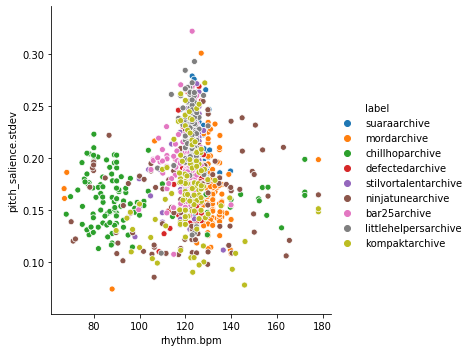

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

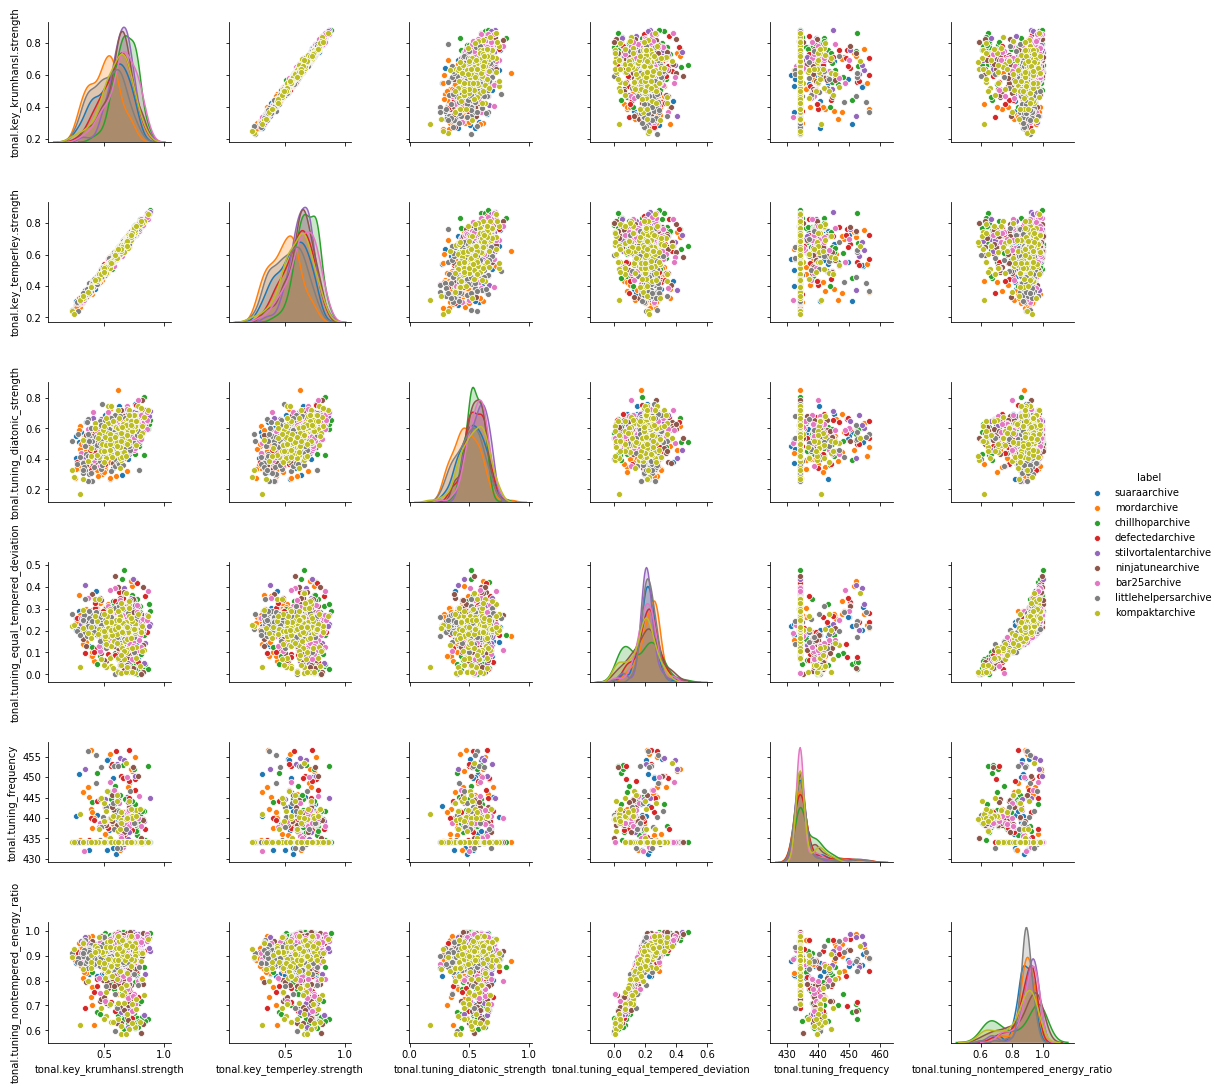

In [7]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [8]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.915925,15.205518,5.838018,0.246517,0.108458,60.859225,137.016503,4.076959,3.967653,15.980535,...,5.822917,2.140991,0.734646,0.603833,0.604427,0.601242,0.539260,0.209188,436.037538,0.881698
std,0.110462,2.410044,0.959629,0.068686,0.033004,61.893973,153.223833,1.766319,1.964413,7.497790,...,1.056927,0.336167,0.085509,0.130688,0.131446,0.130316,0.098463,0.076656,4.271687,0.088232
min,0.054857,9.509272,2.314816,0.097878,0.028646,1.056121,2.608789,0.557705,0.528995,2.048869,...,3.650152,1.039619,0.474336,0.229790,0.233978,0.222564,0.170165,0.001725,431.193909,0.584699
25%,0.907770,13.445353,5.171587,0.198439,0.084982,21.380975,43.166311,2.845227,2.542999,10.549668,...,4.995685,1.897188,0.675930,0.518679,0.516931,0.517037,0.477391,0.176106,434.193115,0.857709
50%,0.953577,15.183897,5.873029,0.239432,0.104657,43.431393,91.034904,3.883132,3.615529,15.063540,...,5.678028,2.115667,0.736817,0.622989,0.624114,0.618896,0.545688,0.216256,434.193115,0.904066
75%,0.973535,16.836051,6.499999,0.289250,0.129137,78.680878,177.136391,5.076058,4.994039,20.713147,...,6.457671,2.369003,0.791679,0.696028,0.697504,0.697647,0.610797,0.253447,434.193115,0.940742
max,0.989285,22.577887,8.564863,0.545457,0.228631,511.851746,2185.637695,13.117954,18.516495,52.696224,...,9.784355,3.289762,1.047988,0.883589,0.882997,0.883447,0.850734,0.476010,456.570251,0.997175




### Preprocessing of the features

**Normalisation of the features**

In [9]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [10]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.921491,0.435872,0.563708,0.332096,0.399092,0.117078,0.061569,0.280190,0.191169,0.275072,...,0.354205,0.489467,0.453778,0.572108,0.570783,0.572988,0.542333,0.437422,0.190872,0.720041
std,0.118214,0.184415,0.153540,0.153461,0.165035,0.121172,0.070189,0.140628,0.109210,0.148039,...,0.172301,0.149398,0.149061,0.199889,0.202531,0.197184,0.144677,0.161624,0.168333,0.213908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.912764,0.301186,0.457080,0.224679,0.281702,0.039791,0.018579,0.182124,0.111967,0.167843,...,0.219349,0.381118,0.351422,0.441863,0.435970,0.445575,0.451425,0.367671,0.118189,0.661881
50%,0.961786,0.434218,0.569310,0.316265,0.380084,0.082959,0.040506,0.264758,0.171593,0.256966,...,0.330585,0.478213,0.457562,0.601406,0.601116,0.599700,0.551778,0.452325,0.118189,0.774269
75%,0.983145,0.560639,0.669624,0.427572,0.502494,0.151968,0.079947,0.359734,0.248230,0.368514,...,0.457683,0.590800,0.553199,0.713121,0.714196,0.718861,0.647447,0.530740,0.118189,0.863186
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.97456731 0.49246306 0.74217602 ... 0.44803448 0.11818908 0.67324962]
 [0.96666636 0.26628628 0.73906485 ... 0.39489064 0.11818908 0.66669085]
 [0.96345811 0.62197364 0.51592216 ... 0.29734977 0.20736905 0.64604535]
 ...
 [0.95801827 0.51151259 0.44809247 ... 0.45280345 0.11818908 0.72052354]
 [0.9829392  0.37181266 0.46757162 ... 0.08351077 0.31699923 0.14595648]
 [0.98505993 0.50735684 0.44287133 ... 0.34999231 0.11818908 0.65043583]]
Class of the first sample:  8


In [12]:
print(y.shape)

(1035,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs      Score
19                 erbbands_kurtosis.stdev  43.295724
49                 silence_rate_60dB.stdev  40.663685
45                 silence_rate_20dB.stdev  38.766291
21                 erbbands_skewness.stdev  33.160260
5                  barkbands_kurtosis.mean  32.351748
..                                     ...        ...
13                      dynamic_complexity   5.397326
31        loudness_ebu128.short_term.stdev   4.961212
80                spectral_strongpeak.mean   3.870787
106         tonal.tuning_diatonic_strength   3.683593
109  tonal.tuning_nontempered_energy_ratio   3.219455

[100 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(1035, 100)


In [16]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [17]:
#All output values: 
print(y)

[8 8 8 ... 3 3 3]


**Splitting data into train and test subsets**

In [18]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [19]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (828, 100) , Size of train output vector:  (828,)
Size of test features matrix:  (207, 100) , Size of test output vector:  (207,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 1}


**Testing the model**



In [21]:
y_pred = clf.predict(X_test)

In [22]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False,

In [23]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.5362318840579711


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

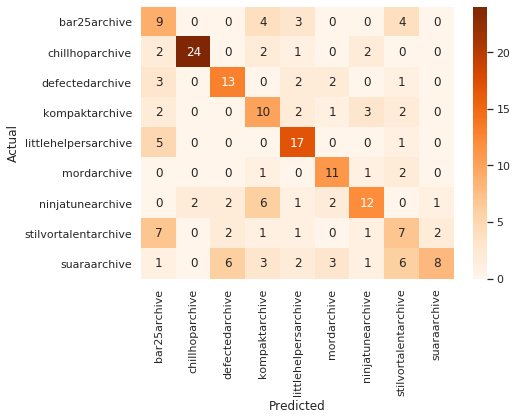

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.45      0.37        20
           1       0.92      0.77      0.84        31
           2       0.57      0.62      0.59        21
           3       0.37      0.50      0.43        20
           4       0.59      0.74      0.65        23
           5       0.58      0.73      0.65        15
           6       0.60      0.46      0.52        26
           7       0.30      0.33      0.32        21
           8       0.73      0.27      0.39        30

    accuracy                           0.54       207
   macro avg       0.55      0.54      0.53       207
weighted avg       0.58      0.54      0.54       207



In [26]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.463768115942029

## Other ML FW


In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [29]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (828, 9)
One-hot encoded y_test shape =  (207, 9)


**Let's define our deep learning architecture**

In [30]:
!pip3 install keras

In [21]:
!pip3 install tensorflow

In [30]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

Using TensorFlow backend.


You can have a look at the summary of the model

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 100)               400       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               11110     
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [32]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,)

Testing the trained model

In [33]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2836403846740723
Test accuracy: 0.5603864789009094


It is a good and common practice to check the learning curves

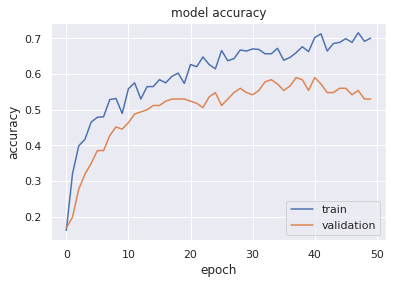

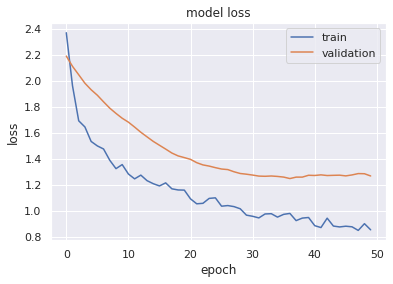

In [34]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [35]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

316


In [36]:
y_pred = y.argmax(axis=1)

In [37]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.5603864734299517

In [38]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.4396135265700483

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        20
           1       0.89      0.81      0.85        31
           2       0.58      0.67      0.62        21
           3       0.43      0.50      0.47        20
           4       0.69      0.78      0.73        23
           5       0.59      0.67      0.62        15
           6       0.55      0.42      0.48        26
           7       0.27      0.29      0.28        21
           8       0.52      0.43      0.47        30

    accuracy                           0.56       207
   macro avg       0.55      0.56      0.55       207
weighted avg       0.57      0.56      0.56       207



**Saving the model**

In [40]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))